## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df = pd.read_csv("covid_19_data.csv")

## Data Pre-Processing

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SNo              236017 non-null  int64 
 1   ObservationDate  236017 non-null  object
 2   Province/State   173972 non-null  object
 3   Country/Region   236017 non-null  object
 4   Last Update      236017 non-null  object
 5   Confirmed        236017 non-null  int64 
 6   Deaths           236017 non-null  int64 
 7   Recovered        236017 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 14.4+ MB


In [5]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [6]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              236017 non-null  int64         
 1   ObservationDate  236017 non-null  datetime64[ns]
 2   Province/State   173972 non-null  object        
 3   Country/Region   236017 non-null  object        
 4   Last Update      236017 non-null  object        
 5   Confirmed        236017 non-null  int64         
 6   Deaths           236017 non-null  int64         
 7   Recovered        236017 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 14.4+ MB


In [8]:
df1 = df[['ObservationDate', 'Confirmed', 'Deaths', 'Recovered']]

In [9]:
df1.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,1,0,0
1,2020-01-22,14,0,0
2,2020-01-22,6,0,0
3,2020-01-22,1,0,0
4,2020-01-22,0,0,0


In [10]:
df1.set_index('ObservationDate', inplace=True)

In [11]:
df1.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,1,0,0
2020-01-22,14,0,0
2020-01-22,6,0,0
2020-01-22,1,0,0
2020-01-22,0,0,0


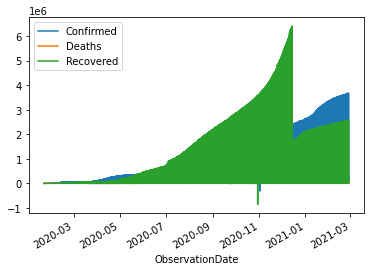

In [12]:
df1.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(df1['Confirmed'])
res[1]

2.340979166192442e-30

In [14]:
res

(-18.252629428467333,
 2.340979166192442e-30,
 84,
 235932,
 {'1%': -3.430377717186092,
  '5%': -2.8615522506397886,
  '10%': -2.566776520573326},
 6359701.3785558995)

In [15]:
res = adfuller(df1['Deaths'])
res[1]

0.0

In [16]:
res

(-30.76160426526663,
 0.0,
 84,
 235932,
 {'1%': -3.430377717186092,
  '5%': -2.8615522506397886,
  '10%': -2.566776520573326},
 4649702.771204941)

In [17]:
res = adfuller(df1['Recovered'])
res[1]

0.0

In [18]:
# the values are less than 0.05 therefore they are stationary

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

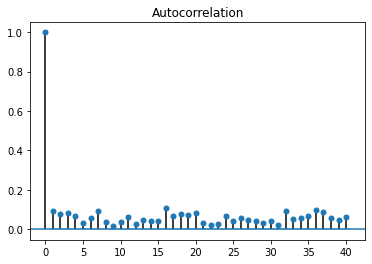

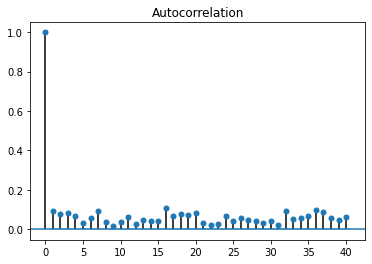

In [20]:
plot_acf(df1['Confirmed'], lags=40)

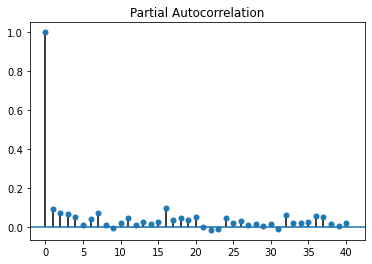

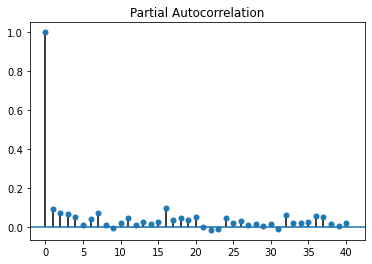

In [21]:
plot_pacf(df1['Confirmed'], lags=40)

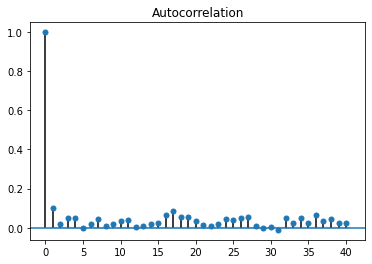

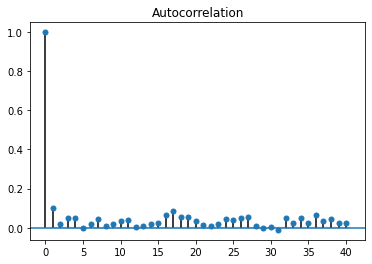

In [22]:
plot_acf(df1['Deaths'], lags=40)

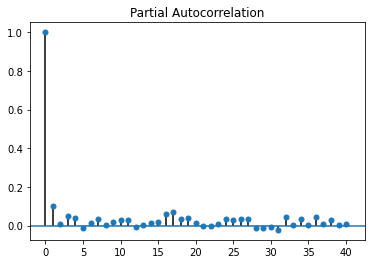

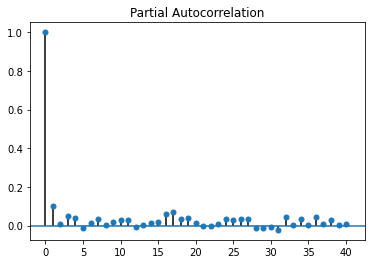

In [23]:
plot_pacf(df1['Deaths'], lags=40)

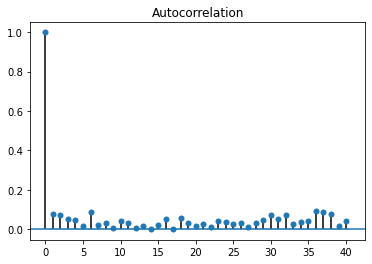

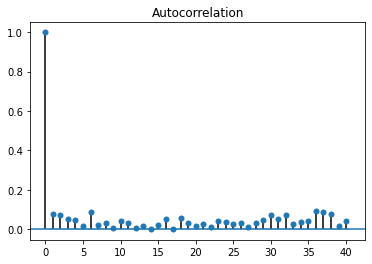

In [24]:
plot_acf(df1['Recovered'], lags=40)

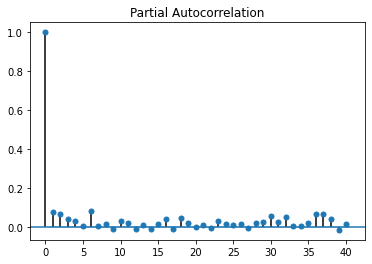

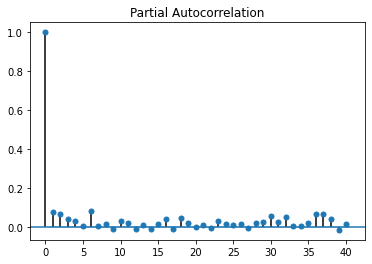

In [25]:
plot_pacf(df1['Recovered'], lags=40)

## ARIMA model

In [26]:
from statsmodels.tsa.arima.model import ARIMA as arima

In [27]:
df1.shape

(236017, 3)

## Train-Test split

In [28]:
len(df1)

236017

In [29]:
# Took Around 74% Train-Test split
split_point = len(df1)-60000 
split_point

176017

In [30]:
y_train = df1[:split_point]
y_train.shape

(176017, 3)

In [31]:
y_test = df1[split_point:]
y_test.shape

(60000, 3)

## Model Training

In [58]:
model_confirmed  = arima(y_train['Confirmed'], order=(5,1,0))
res_confirmed = model_confirmed.fit()

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [59]:
model_deaths  = arima(y_train['Deaths'], order=(5,1,0))
res_deaths = model_deaths.fit()

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [60]:
model_recovered  = arima(y_train['Recovered'], order=(5,1,0))
res_recovered = model_recovered.fit()

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


#### Model predict

In [61]:
y_pred_confirmed = res_confirmed.predict()
y_pred_deaths = res_deaths.predict()
y_pred_recovered = res_recovered.predict()

In [62]:
print(y_pred_confirmed)
print(y_pred_deaths)
print(y_pred_recovered)

ObservationDate
2020-01-22         0.000000
2020-01-22         0.509013
2020-01-22         5.097176
2020-01-22         5.089301
2020-01-22         4.599697
                  ...      
2020-12-11     16231.017351
2020-12-11     51895.145317
2020-12-11    112805.127386
2020-12-11    111050.086258
2020-12-11    119502.043949
Length: 176017, dtype: float64
ObservationDate
2020-01-22       0.000000
2020-01-22       0.000000
2020-01-22       0.000000
2020-01-22       0.000000
2020-01-22       0.000000
                 ...     
2020-12-11     512.498412
2020-12-11    1388.090366
2020-12-11    2413.401422
2020-12-11    2842.668312
2020-12-11    2975.514206
Length: 176017, dtype: float64
ObservationDate
2020-01-22        0.000000
2020-01-22        0.000000
2020-01-22        0.000000
2020-01-22        0.000000
2020-01-22        0.000000
                  ...     
2020-12-11    14511.742044
2020-12-11    41901.160118
2020-12-11    95791.259130
2020-12-11    83269.555454
2020-12-11    81646.725997

## Model Visualization

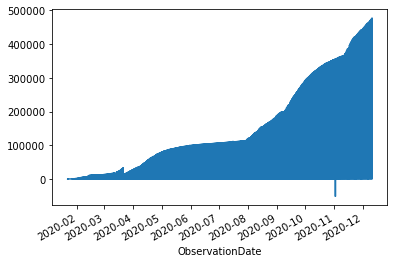

In [63]:
y_pred_confirmed.plot()

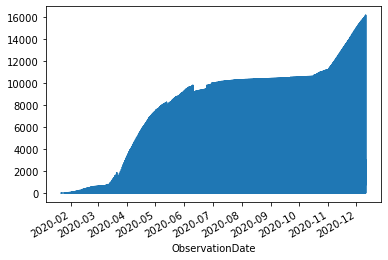

In [64]:
y_pred_deaths.plot()

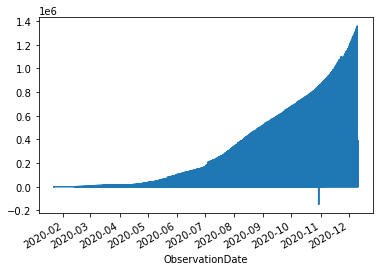

In [65]:
y_pred_recovered.plot()

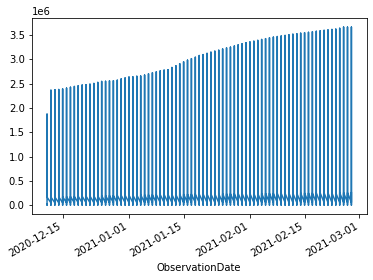

In [66]:
y_test['Confirmed'].plot()

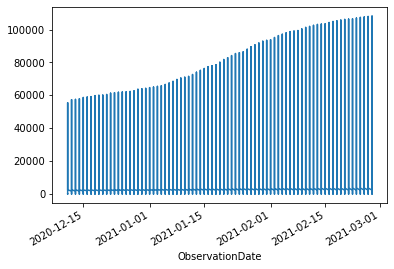

In [67]:
y_test['Deaths'].plot()

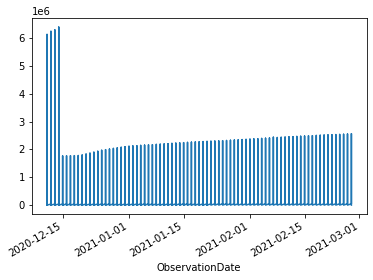

In [68]:
y_test['Recovered'].plot()

## Model Evaluation

In [69]:
from sklearn.metrics import mean_squared_error as mse

In [70]:
y_forecast_confirmed = res_confirmed.forecast(steps=60000)

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [71]:
y_forecast_deaths = res_deaths.forecast(steps=60000)

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [72]:
y_forecast_recovered = res_recovered.forecast(steps=60000)

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [73]:
np.sqrt(mse(y_test['Confirmed'], y_forecast_confirmed))

306196.5291797789

In [74]:
np.sqrt(mse(y_test['Deaths'], y_forecast_deaths))

7105.205368248157

In [75]:
np.sqrt(mse(y_test['Recovered'], y_forecast_recovered))

204756.01610844673

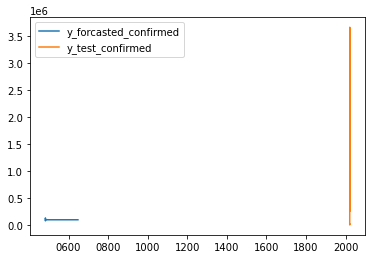

In [76]:
plt.plot(y_forecast_confirmed)
plt.plot(y_test['Confirmed'])
plt.legend(['y_forcasted_confirmed', 'y_test_confirmed'])
plt.show()

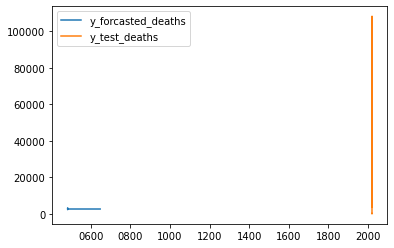

In [77]:
plt.plot(y_forecast_deaths)
plt.plot(y_test['Deaths'])
plt.legend(['y_forcasted_deaths', 'y_test_deaths'])
plt.show()

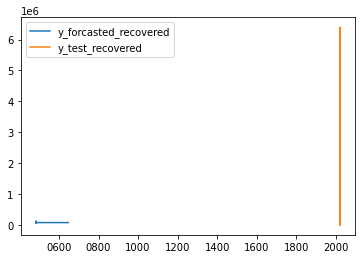

In [79]:
plt.plot(y_forecast_recovered)
plt.plot(y_test['Recovered'])
plt.legend(['y_forcasted_recovered', 'y_test_recovered'])
plt.show()

---------------------------------------------------------------------------------------------------------------

In [89]:
#pip install pmdarima

In [88]:
from pmdarima import auto_arima

In [90]:
model_auto_confirmed = auto_arima(df1['Confirmed'], trace=True, suppress_warnings=True)
model_auto_deaths = auto_arima(df1['Deaths'], trace=True, suppress_warnings=True)
model_auto_recovered = auto_arima(df1['Recovered'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=84.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6531648.759, Time=4.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6466318.287, Time=5.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=47.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6531646.759, Time=2.92 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6438752.172, Time=6.41 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6424830.367, Time=7.70 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6418556.598, Time=9.42 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=6412203.783, Time=10.80 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=264.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=228.23 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=6412201.783, Time=11.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=6418554.598, Time=10.01 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=162.75 sec
 ARIMA(4,1,1)(0,0,0)

In [91]:
model_auto_confirmed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               236017
Model:               SARIMAX(5, 1, 0)   Log Likelihood            -3206094.891
Date:                Wed, 05 May 2021   AIC                        6412201.783
Time:                        15:53:37   BIC                        6412264.013
Sample:                             0   HQIC                       6412219.968
                             - 236017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7997      0.001   -849.227      0.000      -0.802      -0.798
ar.L2         -0.6264      0.001   -492.411      0.000      -0.629      -0.624
ar.L3         -0.4509      0.001   -330.716      0.000      -0.454      -0.448
ar.L4         -0.2880      0.001   -205.129      0.000      -0.291      -0.285
ar.L5         -0.1630      0.001   -141.982      0.000      -0.165      -0.161
sigma2      3.687e+10   2.88e-14   1.28e+24      0.000    3.69e+10    3.69e+10
===================================================================================
Ljung-Box (Q):                    16776.32   Jarque-Bera (JB):          74684751.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              63.43   Skew:                             6.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        89.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.58e+37. Standard errors may be unstable.
"""

In [92]:
model_auto_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               236017
Model:               SARIMAX(5, 1, 0)   Log Likelihood            -2347869.239
Date:                Wed, 05 May 2021   AIC                        4695750.477
Time:                        15:53:51   BIC                        4695812.707
Sample:                             0   HQIC                       4695768.662
                             - 236017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7581      0.001   -850.361      0.000      -0.760      -0.756
ar.L2         -0.6268      0.001   -450.662      0.000      -0.630      -0.624
ar.L3         -0.4507      0.001   -316.662      0.000      -0.453      -0.448
ar.L4         -0.2760      0.001   -184.613      0.000      -0.279      -0.273
ar.L5         -0.1596      0.001   -128.062      0.000      -0.162      -0.157
sigma2       2.56e+07   1.32e+04   1936.581      0.000    2.56e+07    2.56e+07
===================================================================================
Ljung-Box (Q):                    17904.35   Jarque-Bera (JB):          43978172.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.89   Skew:                             5.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        68.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
model_auto_recovered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               236017
Model:               SARIMAX(5, 1, 0)   Log Likelihood            -3154784.855
Date:                Wed, 05 May 2021   AIC                        6309581.709
Time:                        15:53:57   BIC                        6309643.939
Sample:                             0   HQIC                       6309599.894
                             - 236017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8059      0.001  -1441.632      0.000      -0.807      -0.805
ar.L2         -0.6259      0.001   -820.603      0.000      -0.627      -0.624
ar.L3         -0.4743      0.001   -530.595      0.000      -0.476      -0.473
ar.L4         -0.3296      0.001   -350.065      0.000      -0.331      -0.328
ar.L5         -0.2091      0.001   -301.921      0.000      -0.210      -0.208
sigma2      2.387e+10   1.62e-14   1.47e+24      0.000    2.39e+10    2.39e+10
===================================================================================
Ljung-Box (Q):                    13043.52   Jarque-Bera (JB):         676635624.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              41.64   Skew:                            11.16
Prob(H) (two-sided):                  0.00   Kurtosis:                       264.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.11e+37. Standard errors may be unstable.
"""

## ARMA Model

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction resul

307075.05253358855

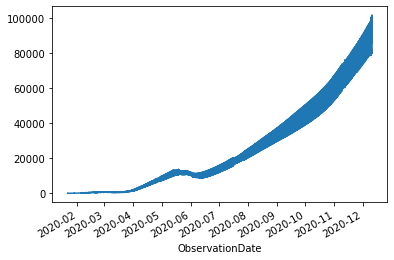

In [101]:
model_confirmed  = arima(y_train['Confirmed'], order=(2,0,2), trend='n')
res_confirmed = model_confirmed.fit()
y_pred_confirmed = res_confirmed.predict()
y_pred_confirmed.plot()
y_forecast_confirmed = res_confirmed.forecast(steps=60000)
np.sqrt(mse(y_test['Confirmed'], y_forecast_confirmed))

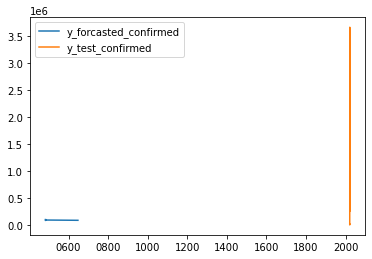

In [102]:
plt.plot(y_forecast_confirmed)
plt.plot(y_test['Confirmed'])
plt.legend(['y_forcasted_confirmed', 'y_test_confirmed'])
plt.show()

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

7146.450504239011

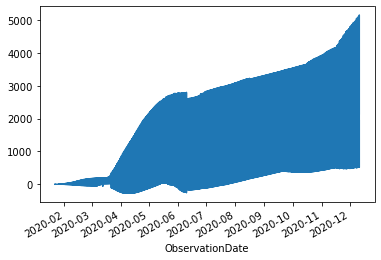

In [111]:
model_deaths  = arima(y_train['Deaths'], order=(5,0,1), trend='n')
res_deaths = model_deaths.fit()
y_pred_deaths = res_deaths.predict()
y_pred_deaths.plot()
y_forecast_deaths = res_deaths.forecast(steps=60000)
np.sqrt(mse(y_test['Deaths'], y_forecast_deaths))

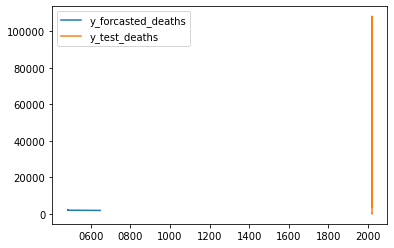

In [112]:
plt.plot(y_forecast_deaths)
plt.plot(y_test['Deaths'])
plt.legend(['y_forcasted_deaths', 'y_test_deaths'])
plt.show()

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction resul

204756.01610844673

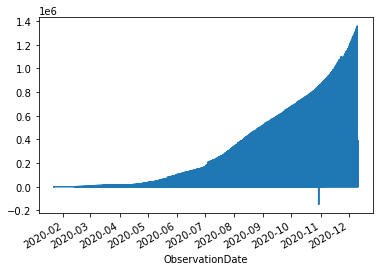

In [99]:
model_recovered = arima(y_train['Recovered'], order=(2,0,2), trend='n')
res_recovered = model_recovered.fit()
y_pred_recovered = res_recovered.predict()
y_pred_recovered.plot()
y_forecast_recovered = res_recovered.forecast(steps=60000)
np.sqrt(mse(y_test['Recovered'], y_forecast_recovered))

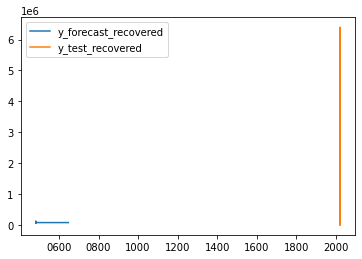

In [100]:
plt.plot(y_forecast_recovered)
plt.plot(y_test['Recovered'])
plt.legend(['y_forecast_recovered', 'y_test_recovered'])
plt.show()

## MA Model

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction resul

317826.1848804405

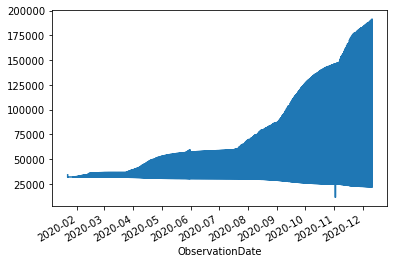

In [104]:
model_confirmed  = arima(y_train['Confirmed'], order=(0,0,1))
res_confirmed = model_confirmed.fit()
y_pred_confirmed = res_confirmed.predict()
y_pred_confirmed.plot()
y_forecast_confirmed = res_confirmed.forecast(steps=60000)
np.sqrt(mse(y_test['Confirmed'], y_forecast_confirmed))

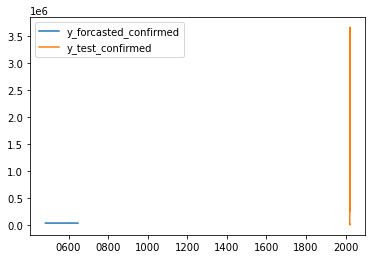

In [105]:
plt.plot(y_forecast_confirmed)
plt.plot(y_test['Confirmed'])
plt.legend(['y_forcasted_confirmed', 'y_test_confirmed'])
plt.show()

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction resul

7293.628731771418

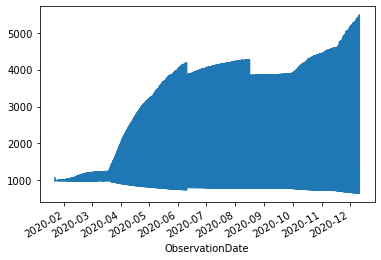

In [106]:
model_deaths  = arima(y_train['Deaths'], order=(0,0,1))
res_deaths = model_deaths.fit()
y_pred_deaths = res_deaths.predict()
y_pred_deaths.plot()
y_forecast_deaths = res_deaths.forecast(steps=60000)
np.sqrt(mse(y_test['Deaths'], y_forecast_deaths))

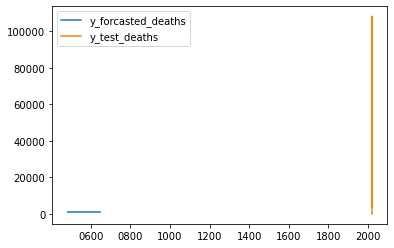

In [107]:
plt.plot(y_forecast_deaths)
plt.plot(y_test['Deaths'])
plt.legend(['y_forcasted_deaths', 'y_test_deaths'])
plt.show()

C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\mehul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction resul

210240.29701631595

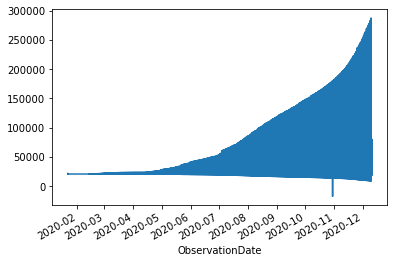

In [108]:
model_recovered = arima(y_train['Recovered'], order=(0,0,1))
res_recovered = model_recovered.fit()
y_pred_recovered = res_recovered.predict()
y_pred_recovered.plot()
y_forecast_recovered = res_recovered.forecast(steps=60000)
np.sqrt(mse(y_test['Recovered'], y_forecast_recovered))

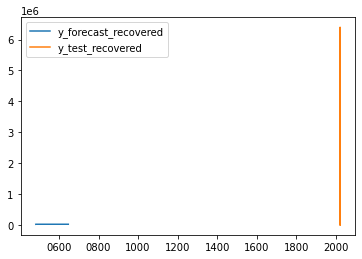

In [109]:
plt.plot(y_forecast_recovered)
plt.plot(y_test['Recovered'])
plt.legend(['y_forecast_recovered', 'y_test_recovered'])
plt.show()